In [7]:
import matplotlib.pyplot as plt
from scipy.stats import hmean
from matplotlib.patches import Ellipse
import seaborn as sns
sns.set()


def plot_samples(mu, sigma_sq, latent1=0, latent2=1, limit=100, ax=None, color="b", label=None):
    if ax is None:
        _, ax = plt.subplots()

    indices = np.random.choice(np.arange(mu.shape[0]), size=limit)
    
    ax.scatter(
        mu[indices, latent1],
        mu[indices, latent2],
        s=0.5,
        c=color,
        label=label,
    )
    for index in indices:
        elp = Ellipse(
            (mu[index, latent1], mu[index, latent2]),
            sigma_sq[index, latent1],
            sigma_sq[index, latent2],
            fc="None",
            edgecolor=color,
            lw=0.5,
        )
        ax.add_patch(elp)
    ax.set(
        xlabel=f"Latent dim {latent1}",
        ylabel=f"Latent dim {latent2}",
    )

def plot_histogram(sigma_sq, mean="harmonic", ax=None, color="b", label=None):
    if ax is None:
        _, ax = plt.subplots()
    
    if mean == "harmonic":
        mean_sigma_sq = hmean(sigma_sq, axis=1)
    elif mean == "arithmetic":
        mean_sigma_sq = np.mean(sigma_sq, axis=1)
    else:
        raise NotImplementedError
    
    sns.kdeplot(mean_sigma_sq, ax=ax, color=color, label=label)
    ax.set(xlabel="Variance")

In [8]:
import numpy as np

mu = np.load("../results/casia_lfw_mu.npy")
sigma_sq = np.load("../results/casia_lfw_sigma_sq.npy")

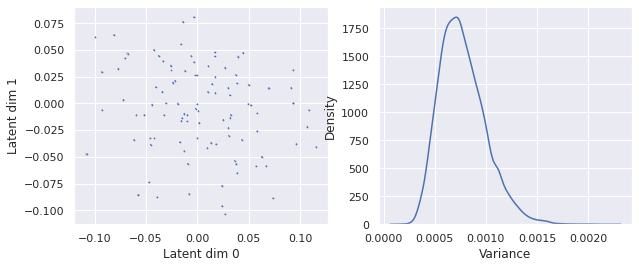

In [9]:
fig, ax = plt.subplots(ncols=2 ,figsize=(10, 4))
plot_samples(mu, sigma_sq, limit=100, ax=ax[0])
plot_histogram(sigma_sq, ax=ax[1])